In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.DataFrame([
    [0,0,0],
    [1,0,1],
    [0,1,1],
    [1,1,0],
] * 1000)


In [3]:
df.columns = ['x1','x2','y']

In [4]:
df.columns

Index(['x1', 'x2', 'y'], dtype='object')

In [5]:
df

,x1,x2,y
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,0
4,0,0,0
...,...,...,...
3995,1,1,0
3996,0,0,0
3997,1,0,1
3998,0,1,1


In [6]:
df['x1'] += np.random.normal(size=4000) * 0.1
df['x2'] += np.random.normal(size=4000) * 0.1


In [7]:
df

,x1,x2,y
0,-0.221696,0.077995,0
1,0.946057,0.068817,1
2,0.158235,1.001229,1
3,0.876170,1.016213,0
4,0.081635,-0.021490,0
...,...,...,...
3995,1.048349,0.824845,0
3996,0.108902,0.018661,0
3997,1.008645,0.004509,1
3998,-0.162960,0.757863,1


<Axes: xlabel='x1', ylabel='x2'>

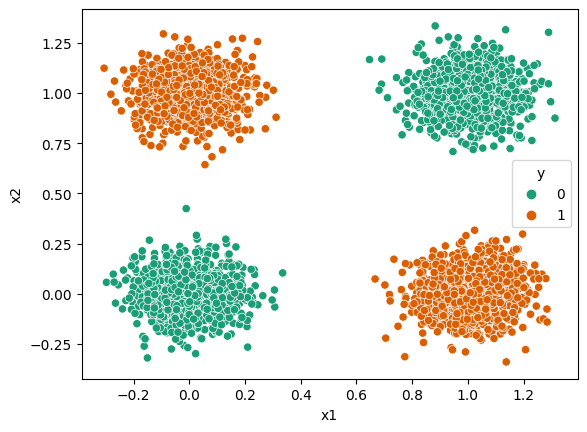

In [8]:
sns.scatterplot(data=df,x='x1', y='x2', hue='y', palette='Dark2')

In [9]:
X , test = train_test_split(df,test_size=0.3)

**Let's define a Sigmoid function**

In [10]:
def sig(z):
    return (1/(1 + np.exp(-2)))

**Matrix of the coefficients**

In [11]:
W = np.array([[1,-1,0.],[-1,1,0.]]) # Use dot to make it float for np
U = np.array([1,1,0])

In [12]:
W

array([[ 1., -1.,  0.],
       [-1.,  1.,  0.]])

In [13]:
# Learning rate 
lr = 0.001

In [14]:
for re in range(500):
    # keep the total error 
    total_error = 0.0
    # Gradient of the matrix U 
    DUf = U * 0.0
    # Gradient of the matrix U 
    DWf = W * 0.0
    
    # Coefficients of w1 w2 and b1 are from W[0]
    w11 , w21 , b1 = W[0]
    
    w12 , w22 , b2 = W[1]
    
    u1 , u2 , c  = U
    
    for index , row in X.iterrows():
        x1 , x2 , y = row
        A1 = sig(w11*x1 + w21*x2 + b1)
        A2 = sig(w12*x1 + w22*x2 + b2)
        A3 = sig(u1*A1 + u2*A2 + c)
        err = A3 - y
        DUf += err * np.array([A1,A2,1])
        DWf += err * np.array([u1 * A1*(1-A1), u2 * A2*(1-A2)]).reshape((2,1)) @ np.array([x1,x2,1]).reshape(1,3)
        total_error += err ** 2
        
    U = U - lr * DUf
    W = W - lr * DWf
    
    if re%10 == 0:
        print(re, total_error)

0 1110.5875258058984
10 1110.5875258058984
20 1110.5875258058984
30 1110.5875258058984
40 1110.5875258058984
50 1110.5875258058984
60 1110.5875258058984
70 1110.5875258058984
80 1110.5875258058984
90 1110.5875258058984
100 1110.5875258058984
110 1110.5875258058984
120 1110.5875258058984
130 1110.5875258058984
140 1110.5875258058984
150 1110.5875258058984
160 1110.5875258058984
170 1110.5875258058984
180 1110.5875258058984
190 1110.5875258058984
200 1110.5875258058984
210 1110.5875258058984
220 1110.5875258058984
230 1110.5875258058984
240 1110.5875258058984
250 1110.5875258058984
260 1110.5875258058984
270 1110.5875258058984
280 1110.5875258058984
290 1110.5875258058984
300 1110.5875258058984
310 1110.5875258058984
320 1110.5875258058984
330 1110.5875258058984
340 1110.5875258058984
350 1110.5875258058984
360 1110.5875258058984
370 1110.5875258058984
380 1110.5875258058984
390 1110.5875258058984
400 1110.5875258058984
410 1110.5875258058984
420 1110.5875258058984
430 1110.5875258058984

In [15]:
def predict(df):
    output = []
    # Coefficients of w1 w2 and b1 are from W[0]
    w11 , w21 , b1 = W[0]
    
    w12 , w22 , b2 = W[1]
    
    u1 , u2 , c  = U
    
    for index , row in df.iterrows():
        x1 , x2 , y = row
        A1 = sig(w11*x1 + w21*x2 + b1)
        A2 = sig(w12*x1 + w22*x2 + b2)
        A3 = sig(u1*A1 + u2*A2 + c)
        
        output.append(np.round(A3))
    
    return (pd.Series(output))
    
    

In [16]:
from sklearn.metrics import classification_report

print(classification_report(test['y'], predict(test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       594
           1       0.51      1.00      0.67       606

    accuracy                           0.51      1200
   macro avg       0.25      0.50      0.34      1200
weighted avg       0.26      0.51      0.34      1200



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
